In [14]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import datasets # for the moon!

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from functions import *

[[-1.2  0. ]
 [-1.1  0. ]
 [-1.   0. ]
 [ 1.   0. ]
 [ 2.   0. ]]
[-1 -1 -1  1  1]
At -0.50 the svm predicts -1 and the logistic regression predicts -1

At -0.39 the svm predicts -1 and the logistic regression predicts -1

At -0.28 the svm predicts -1 and the logistic regression predicts -1

At -0.17 the svm predicts -1 and the logistic regression predicts -1

At -0.06 the svm predicts -1 and the logistic regression predicts -1

At 0.06 the svm predicts 1 and the logistic regression predicts -1

At 0.17 the svm predicts 1 and the logistic regression predicts 1

At 0.28 the svm predicts 1 and the logistic regression predicts 1

At 0.39 the svm predicts 1 and the logistic regression predicts 1

At 0.50 the svm predicts 1 and the logistic regression predicts 1



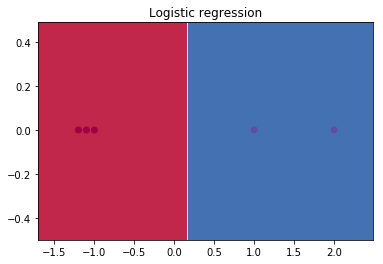

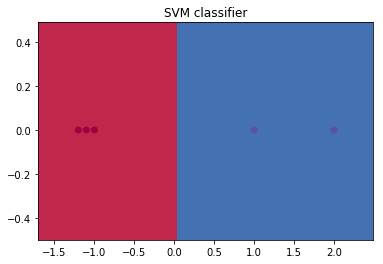

In [48]:
def plot_decision_boundary(pred_func, X, y, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.show()

def visualize(clf, X, y, title = ''):
    # plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    # plt.show()
    plot_decision_boundary( lambda x: clf.predict(x), X, y, title)

X = np.array([[-1.2,0],[-1.1,0],[-1,0],[1,0],[2,0]])
y = np.array([-1, -1, -1, 1, 1])

print(X)
print(y)

log_clf = LogisticRegression()
log_clf.fit(X,y)
svm_clf = svm.LinearSVC()
svm_clf.fit(X,y)

for x in np.linspace(-0.5,.5,10) :
    print("At %.2f the svm predicts %d and the logistic regression predicts %d" % (x, svm_clf.predict(np.array([[x,0]])), log_clf.predict(np.array([[x,0]]))))
    print("")
    
visualize(log_clf, X,y, 'Logistic regression')
visualize(svm_clf, X,y, 'SVM classifier')